In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
from datetime import datetime
import seaborn as sns

In [15]:
# Define the data folder paths for BeerAdvocate
DATA_FOLDER_BA = '../Dataset/BeerAdvocate/'

# Define the file paths for the datasets
Beers_DATASET = DATA_FOLDER_BA+"beers_filtered.csv"
Users_DATASET = DATA_FOLDER_BA+"users_filtered.csv"
Reviews_DATASET = DATA_FOLDER_BA+"reviews_filtered.csv"
Breweries_DATASET = DATA_FOLDER_BA+"breweries_filtered.csv"
Merged_DATASET = DATA_FOLDER_BA+"review-user_brewery.csv"

In [16]:
# Read the datasets into Pandas DataFrames
# beers = pd.read_csv(Beers_DATASET)
# users = pd.read_csv(Users_DATASET)
# reviews = pd.read_csv(Reviews_DATASET)
# breweries = pd.read_csv(Breweries_DATASET)
merged = pd.read_csv(Merged_DATASET)

In [17]:
# Clarify columns
merged.rename(columns={
    'nbr_ratings': 'nbr_ratings_user',
    'nbr_reviews': 'nbr_reviews_user',
    'date': 'date_review',
    'joined': 'joined_user',
    'nbr_beers':'nbr_beers_brewery'
}, inplace=True)

date_format = '%Y-%m-%d %H:%M:%S'
merged['joined_user_year'] = merged.joined_user.apply(lambda x: datetime.strptime(x, date_format).year)
merged['date_review_year'] = merged.date_review.apply(lambda x: datetime.strptime(x, date_format).year)

display(merged)

,beer_name,beer_id,brewery_name,brewery_id,style,date_review,user_name,user_id,appearance,aroma,...,rating,text,nbr_ratings_user,nbr_reviews_user,joined_user,user_location,brewery_location,nbr_beers_brewery,joined_user_year,date_review_year
0,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-09 10:00:00,Proteus93,proteus93.185128,4.0,4.5,...,4.37,"A: A deep amber, with a bit of a shorter head....",1010,1010,2008-01-08 11:00:00,"United States, Virginia","United States, California",41,2008,2008
1,Double Bastard Ale,1056,Arrogant Brewing,43153,American Strong Ale,2008-05-22 10:00:00,Proteus93,proteus93.185128,4.5,4.5,...,4.55,A: Poured into a standard Stone pintglass. A d...,1010,1010,2008-01-08 11:00:00,"United States, Virginia","United States, California",41,2008,2008
2,OAKED Arrogant Bastard Ale,8951,Arrogant Brewing,43153,American Strong Ale,2008-01-26 11:00:00,Proteus93,proteus93.185128,5.0,4.0,...,4.41,"A: A deep brown pour, some red highlights. Bea...",1010,1010,2008-01-08 11:00:00,"United States, Virginia","United States, California",41,2008,2008
3,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-07 10:00:00,Jerico,jerico.36192,4.0,4.0,...,3.40,Poured this into a Bordeaux wine glass.A - A p...,47,47,2005-08-23 10:00:00,"United States, New York","United States, California",41,2005,2008
4,Arrogant Bastard Ale,92,Arrogant Brewing,43153,American Strong Ale,2008-04-06 10:00:00,armock,armock.159910,4.0,4.5,...,4.32,A - Poured a dark amber color with an of white...,1409,1256,2007-09-21 10:00:00,"United States, New York","United States, California",41,2007,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344228,La Porteña Stout,273430,La Porteña Cervecería Artesanal,48642,American Stout,2017-03-23 11:00:00,Short_And_Stout,short_and_stout.1194173,4.0,3.5,...,3.76,"Look: dark brown, hints of red when held up to...",1,1,2017-03-15 11:00:00,"United States, Pennsylvania",Nicaragua,1,2017,2017
2344229,Public Static Lemongrass IPA,156860,Nerdbrewing,38748,American IPA,2015-02-08 11:00:00,kazin,kazin.236728,3.75,4.5,...,4.36,Sampled from bottle. Very cloudy appearance bu...,23,6,2008-07-23 10:00:00,Sweden,Sweden,4,2008,2015
2344230,R34 Porter,131988,Kozy Yak Brewery,33346,American Porter,2014-08-03 10:00:00,WalterDragon,walterdragon.838867,3.0,2.0,...,1.51,"Thought I would try a small, local brew pub. T...",16,2,2014-08-03 10:00:00,"United States, Wisconsin","United States, Wisconsin",9,2014,2014
2344231,Can't Hook Kolsch,258870,Sawmill Brewing Company,44767,Kölsch,2017-02-27 11:00:00,Gully13,gully13.1192412,4.25,4.5,...,4.69,Poured from a growlerOverall a great take on t...,4,3,2017-02-27 11:00:00,"United States, North Carolina","United States, Wisconsin",11,2017,2017


In [18]:
# delete useless columns
# print(merged.columns)
submerged = merged[['brewery_name', 'brewery_id', 'date_review_year', 'rating', 'user_location', 'nbr_beers_brewery']]

In [22]:
# merge by the year of rating for each brewery
submerged_brewery_year = submerged.groupby(['date_review_year','brewery_id']).apply(lambda x: pd.Series({
    'brewery_nbr_reviews': x.size,
    'brewery_avg_rating': x.rating.mean(),
    'brewery_rating_list': x.rating.tolist(),
    'user_locations': x.user_location.tolist()
})).reset_index()
display(submerged_brewery_year)

,date_review_year,brewery_id,brewery_nbr_reviews,brewery_avg_rating,brewery_rating_list,user_locations
0,1996,33,6,3.850000,[3.85],"[United States, California]"
1,1998,5,18,3.530000,"[4.2, 2.77, 3.62]","[United States, California, United States, Cal..."
2,1998,9,6,4.480000,[4.48],"[United States, California]"
3,1998,11,66,4.077273,"[3.85, 4.3, 4.35, 4.1, 4.17, 4.67, 3.82, 3.78,...","[United States, Massachusetts, United States, ..."
4,1998,13,18,4.210000,"[4.37, 4.18, 4.08]","[United States, Massachusetts, United States, ..."
...,...,...,...,...,...,...
55238,2017,49795,6,4.080000,[4.08],"[United States, Ohio]"
55239,2017,49796,12,3.665000,"[3.52, 3.81]","[United States, Colorado, United States, Color..."
55240,2017,49803,6,4.300000,[4.3],[Hungary]
55241,2017,49808,12,3.670000,"[3.47, 3.87]","[Canada, Canada]"


In [24]:
# merge by the year of ratings for all breweries
'''
For each year::
nbr_reviews: #reviews received for all breweries
brewery_nbr_reviews: a list of #reviews for each brewery 
macro_avg_brewery_rating: the macro average rating of each brewery
brewery_avg_rating_list: the list of each brewery's average rating
ratings: all received rating scores
user_locations: the list of all user locations
'''
submerged_year = submerged_brewery_year.groupby(['date_review_year']).apply(lambda x: pd.Series({
    'nbr_reviews': x.brewery_nbr_reviews.sum(),
    'brewery_nbr_reviews': x.brewery_nbr_reviews.tolist(),
    'macro_avg_brewery_rating': x.brewery_avg_rating.mean(),
    'brewery_avg_rating_list': x.brewery_avg_rating.tolist(),
    'ratings': x.brewery_rating_list.sum(),
    'user_locations': x.user_locations.sum()
})).reset_index()

submerged_year['micro_avg_rating'] = submerged_year.ratings.agg(lambda x: np.mean(x))

display(submerged_year)

,date_review_year,nbr_reviews,brewery_nbr_reviews,macro_avg_brewery_rating,ratings,brewery_avg_rating_list,user_locations,micro_avg_rating
0,1996,6,[6],3.850000,[3.85],[3.85],"[United States, California]",3.850000
1,1998,684,"[18, 6, 66, 18, 6, 6, 12, 6, 12, 12, 6, 6, 6, ...",3.795365,"[4.2, 2.77, 3.62, 4.48, 3.85, 4.3, 4.35, 4.1, ...","[3.53, 4.48, 4.077272727272727, 4.21, 3.45, 3....","[United States, California, United States, Cal...",3.825614
2,1999,414,"[6, 6, 24, 66, 36, 6, 6, 18, 24, 6, 6, 6, 6, 6...",3.725995,"[3.32, 3.88, 3.4, 4.2, 4.29, 4.38, 3.9, 3.45, ...","[3.32, 3.88, 4.0675, 4.048181818181818, 4.0066...","[United States, California, United States, Mas...",3.877246
3,2000,624,"[6, 54, 6, 6, 6, 6, 12, 6, 6, 12, 6, 6, 6, 6, ...",4.032609,"[3.26, 4.35, 3.97, 3.79, 4.42, 4.17, 4.27, 4.0...","[3.26, 4.16, 3.99, 4.8, 4.47, 4.0, 3.83, 3.8, ...","[United States, California, United States, Cal...",4.030385
4,2001,6756,"[18, 12, 18, 6, 42, 30, 36, 6, 30, 66, 12, 30,...",3.809420,"[3.7, 4.76, 4.84, 4.1, 4.06, 4.06, 4.94, 2.66,...","[4.433333333333334, 4.08, 3.8866666666666667, ...","[Canada, United States, Texas, United States, ...",3.846972
5,2002,112320,"[324, 72, 534, 462, 342, 66, 168, 252, 30, 6, ...",3.603234,"[3.36, 4.08, 3.17, 3.21, 4.1, 4.3, 2.79, 4.42,...","[3.701851851851852, 3.4441666666666673, 3.4416...","[United States, New York, United States, Misso...",3.744965
6,2003,280200,"[534, 102, 738, 1926, 966, 162, 642, 534, 18, ...",3.453660,"[3.83, 4.05, 2.73, 3.43, 3.72, 3.1, 3.77, 3.51...","[3.5510112359550563, 3.2758823529411765, 3.329...","[United States, Arizona, Canada, Australia, Un...",3.703797
7,2004,348120,"[492, 36, 984, 1734, 1476, 102, 654, 570, 48, ...",3.461509,"[3.76, 3.88, 3.87, 3.88, 4.0, 2.38, 3.65, 3.12...","[3.6824390243902436, 2.5966666666666667, 3.358...","[Canada, United States, Massachusetts, United ...",3.743285
8,2005,435786,"[456, 30, 1392, 2496, 1104, 126, 672, 528, 90,...",3.485970,"[3.88, 3.26, 3.08, 3.1, 4.3, 3.28, 3.75, 3.58,...","[3.4814473684210525, 2.7840000000000003, 3.436...","[United States, Pennsylvania, Sweden, United S...",3.759950
9,2006,634074,"[636, 2538, 3522, 66, 276, 966, 750, 36, 612, ...",3.471542,"[2.62, 4.05, 3.01, 3.35, 4.0, 3.72, 3.38, 3.7,...","[3.546226415094339, 3.44177304964539, 4.048637...","[Canada, United States, Minnesota, Canada, Uni...",3.749916


In [134]:
stats_by_year = pd.DataFrame({
    'year': submerged_year.date_review_year,
        'macro_average': submerged_year.macro_avg_brewery_rating,
        'macro_std': submerged_year.brewery_avg_rating_list.apply(lambda x: np.std(x)),
        'micro_average': submerged_year.micro_avg_rating,
        'micro_std': submerged_year.ratings.apply(lambda x: np.std(x)),
        'nbr_reviews': submerged_year.nbr_reviews,
        'average_nbr_reviews': submerged_year.brewery_nbr_reviews.apply(lambda x: np.mean(x)),
        'nbr_reviews_std': submerged_year.brewery_nbr_reviews.apply(lambda x: np.std(x)),
        'nbr_reviews_percentage': submerged_year[['nbr_reviews','brewery_nbr_reviews']].apply(lambda x: [y / x['nbr_reviews'] for y in x['brewery_nbr_reviews']], axis=1)
})
stats_by_year['percentage_mean'] = stats_by_year.nbr_reviews_percentage.apply(lambda x: np.mean(x))
stats_by_year['percentage_median'] = stats_by_year.nbr_reviews_percentage.apply(lambda x: np.median(x))
stats_by_year['percentage_std'] = stats_by_year.nbr_reviews_percentage.apply(lambda x: np.std(x))
stats_by_year['nbr_brewery'] = stats_by_year.nbr_reviews_percentage.apply(lambda x: len(x))

stats_by_year.head()

,year,macro_average,macro_std,micro_average,micro_std,nbr_reviews,average_nbr_reviews,nbr_reviews_std,nbr_reviews_percentage,percentage_mean,percentage_median,percentage_std,nbr_brewery
0,1996,3.850000,0.000000,3.850000,0.000000,6,6.000000,0.000000,[1.0],1.000000,1.000000,0.000000,1
1,1998,3.795365,0.514291,3.825614,0.525658,684,13.411765,11.056320,"[0.02631578947368421, 0.008771929824561403, 0....",0.019608,0.017544,0.016164,51
2,1999,3.725995,0.523807,3.877246,0.441177,414,14.275862,16.927628,"[0.014492753623188406, 0.014492753623188406, 0...",0.034483,0.014493,0.040888,29
3,2000,4.032609,0.508432,4.030385,0.495062,624,9.043478,8.824266,"[0.009615384615384616, 0.08653846153846154, 0....",0.014493,0.009615,0.014141,69
4,2001,3.809420,0.726069,3.846972,0.846238,6756,21.447619,27.495448,"[0.0026642984014209592, 0.0017761989342806395,...",0.003175,0.001776,0.004070,315


Text(0, 0.5, 'Ratings')

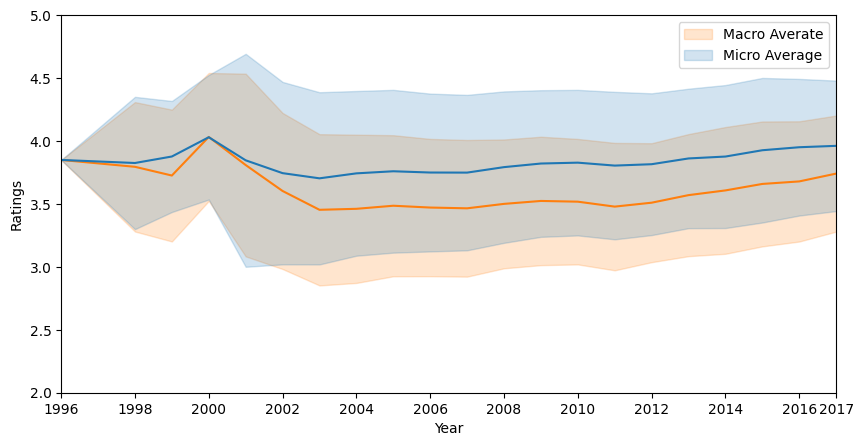

In [84]:
plt.figure(figsize=(10, 5), dpi=100)
plt.fill_between(stats_by_year.year, stats_by_year.macro_average - stats_by_year.macro_std,
                 stats_by_year.macro_average + stats_by_year.macro_std, alpha = 0.2, color = 'C1')
plt.plot(stats_by_year.year, stats_by_year.macro_average, color = 'C1', label='_nolegend_')
plt.fill_between(stats_by_year.year, stats_by_year.micro_average - stats_by_year.micro_std,
                 stats_by_year.micro_average + stats_by_year.micro_std, alpha = 0.2, color = 'C0')
line_micro = plt.plot(stats_by_year.year, stats_by_year.micro_average, color = 'C0', label='_nolegend_')

plt.ylim([2, 5])
plt.xlim([1996, 2017])
plt.xticks([1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2017])
plt.legend(['Macro Average','Micro Average'])
plt.xlabel('Year')
plt.ylabel('Ratings')

Given that the micro averages are generally higher than micro averages, it is likely that there exists some breweries receiving more high scores. The idendity of micro and macro averages at the year 1996 is because only one brewery was rated that year.

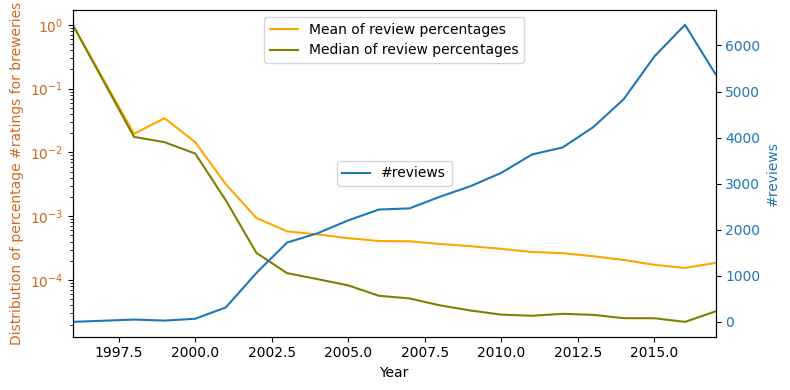

In [167]:
t = stats_by_year.year

fig, ax1 = plt.subplots(figsize=(8, 4), dpi=100)

# color = 'C1'
ax1.set_xlabel('Year')
ax1.set_yscale('log')
ax1.set_xlim([1996,2017])
ax1.set_ylabel('Distribution of percentage #ratings for breweries', color='chocolate')
ax1.plot(stats_by_year.year, stats_by_year.percentage_mean, color = 'orange')
ax1.plot(stats_by_year.year, stats_by_year.percentage_median, color = 'olive')
plt.legend(['Mean of review percentages','Median of review percentages'], loc = 'upper center')
# ax1.errorbar(stats_by_year.year, stats_by_year.percentage_mean,
#              yerr = stats_by_year.percentage_std,
#              capsize= 3, color = color)
ax1.tick_params(axis='y', labelcolor='chocolate')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('#reviews', color=color2) 
ax2.set_xlim([1996,2017])
ax2.plot(stats_by_year.year, stats_by_year.nbr_brewery, color = color2)
ax2.tick_params(axis='y', labelcolor=color2)
plt.legend(['#reviews'], loc='center')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Observing the divergence between the mean and median, we further explore the distribution of review percentages of breweries.

Text(0, 0.5, 'Percentage of #reviews')

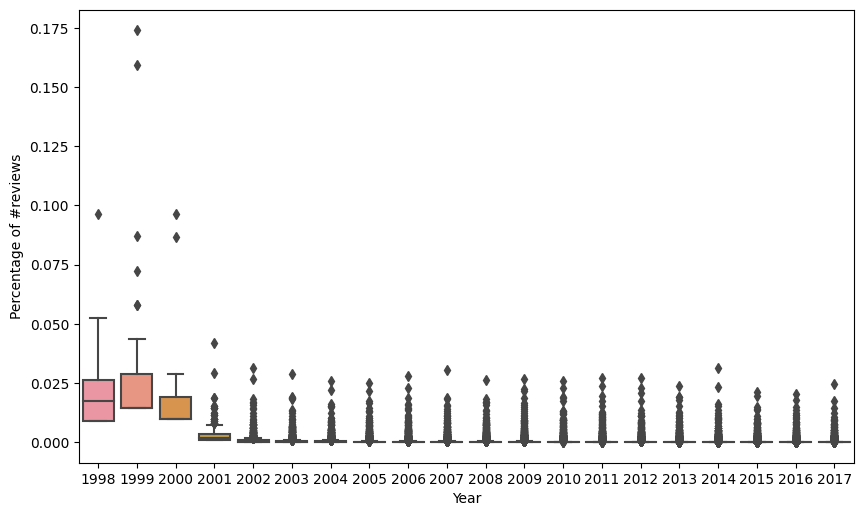

In [147]:
stats_by_year_long = stats_by_year[stats_by_year.year >= 1997][['year','nbr_reviews_percentage']].copy()
stats_by_year_long = stats_by_year_long.explode('nbr_reviews_percentage')
# df_long['grades'] = pd.to_numeric(df_long['grades'])
plt.figure(figsize=(10, 6), dpi=100)
ax = sns.boxplot(data=stats_by_year_long, x='year', y='nbr_reviews_percentage')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of #reviews')

Investigate the monopoly of beer market?